In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df =pd.read_csv("Cleaned_Algerian_forest_fire_dataset.csv")

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [34]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [35]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [36]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [48]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [49]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [50]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [51]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [52]:
# Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state = 45)

In [53]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [54]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.660795,-0.278939,-0.370676,0.686037,0.489583,0.377292,0.625153,0.461357,0.531519,0.303753
RH,-0.660795,1.000000,0.229917,0.232069,-0.650166,-0.410087,-0.228161,-0.705548,-0.354014,-0.437177,-0.427609
Ws,-0.278939,0.229917,1.000000,0.274892,-0.170338,-0.015730,0.080056,-0.015707,0.024178,-0.106463,-0.249133
Rain,-0.370676,0.232069,0.274892,1.000000,-0.549174,-0.277992,-0.289827,-0.339779,-0.289332,-0.364482,-0.087988
FFMC,0.686037,-0.650166,-0.170338,-0.549174,1.000000,0.591452,0.496276,0.746234,0.579781,0.768765,0.245305
DMC,0.489583,-0.410087,-0.015730,-0.277992,0.591452,1.000000,0.881988,0.671494,0.982540,0.560499,0.210788
DC,0.377292,-0.228161,0.080056,-0.289827,0.496276,0.881988,1.000000,0.494381,0.943979,0.485457,-0.051156
ISI,0.625153,-0.705548,-0.015707,-0.339779,0.746234,0.671494,0.494381,1.000000,0.633688,0.726887,0.295307
BUI,0.461357,-0.354014,0.024178,-0.289332,0.579781,0.982540,0.943979,0.633688,1.000000,0.562938,0.110407
Classes,0.531519,-0.437177,-0.106463,-0.364482,0.768765,0.560499,0.485457,0.726887,0.562938,1.000000,0.179664


<AxesSubplot: >

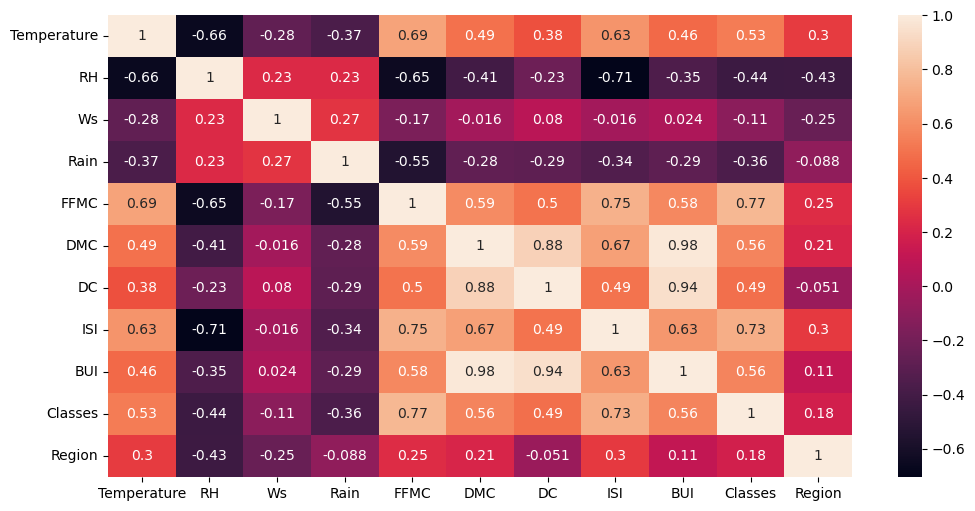

In [55]:
## Check for multicollinearity
plt.figure(figsize= (12,6))
sns.heatmap(X_train.corr(), annot=True)

In [56]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [57]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis = 1,inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.03973391,  0.00396204,  0.21039187, ...,  0.54677005,
         0.85634884,  1.01105006],
       [-0.03239964, -0.97934302, -0.52597966, ..., -0.71718494,
        -1.16774842, -0.98907071],
       [-0.30043303, -0.45491366, -1.63053696, ...,  0.15786082,
         0.85634884, -0.98907071],
       ...,
       [-0.56846642, -1.37266504, -0.1577939 , ...,  0.88706562,
         0.85634884,  1.01105006],
       [ 1.57580069, -1.2415577 , -0.89416543, ..., -0.15812793,
         0.85634884,  1.01105006],
       [ 1.3077673 , -0.586021  , -0.52597966, ...,  0.78983831,
         0.85634884,  1.01105006]])

## Box Plots To understand Effect Of Standard Scaler

/tmp/ipykernel_4309/1698594075.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot (1,2,1)


Text(0.5, 1.0, 'X_train After scaling')

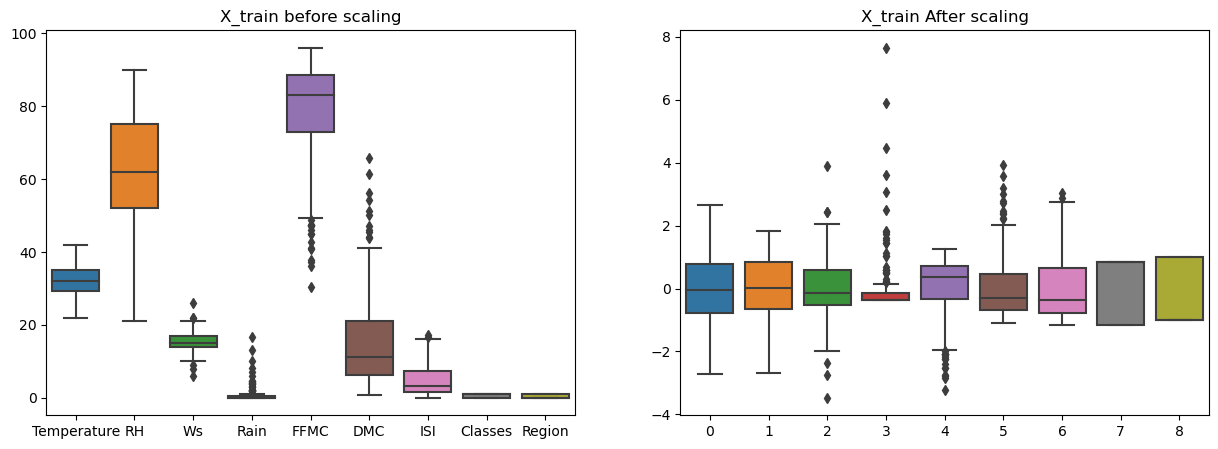

In [59]:
plt.subplots (figsize = (15,5 ))
plt.subplot (1,2,1)
sns.boxplot(X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train After scaling")

# Linear Regression Model

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,Y_train)
y_pred_l = linreg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred_l)
score = r2_score(Y_test,y_pred_l)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.7713645614904525
R2 Score 0.9096193210066799


In [66]:
# Lasso regression 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred_las = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred_las)
score = r2_score(Y_test,y_pred_las)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1873366121992213
R2 Score 0.9153377261039456


In [67]:
# Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred_r=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred_r)
score=r2_score(Y_test,y_pred_r)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.7619995110582053
R2 Score 0.9123601798432848


In [69]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,Y_train)
y_pred_els=elastic.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,y_pred_els)
score=r2_score(Y_test,y_pred_els)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.715773792920221
R2 Score 0.8844387249095774


In [71]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open ("ridge.pkl","wb"))